In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sns

import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np

In [2]:
# 데이터셋 인스턴스 생성

data = pd.read_csv(r"C:\Users\tjdgu\CodingFiles\AI_Introduction\week7\BP_data.csv")  # CSV 파일 경로

In [3]:
data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48149 (\N{HANGUL SYLLABLE BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


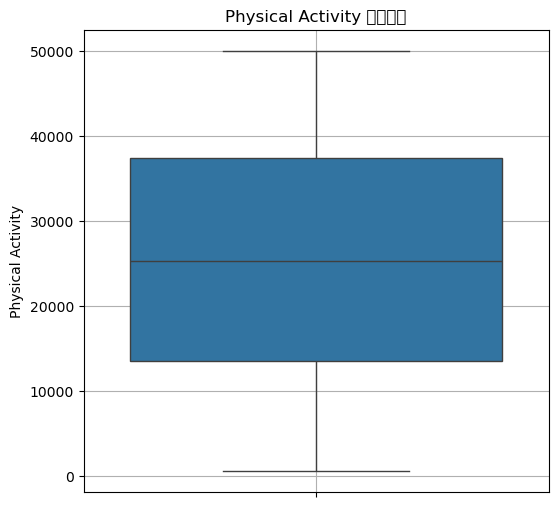

In [4]:
# 'Physical_activity' 컬럼 박스플롯으로 시각화
plt.figure(figsize=(6, 6))
sns.boxplot(y=data['Physical_activity'])
plt.title("Physical Activity 박스플롯")
plt.ylabel("Physical Activity")
plt.grid(True)
plt.show()

c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(b

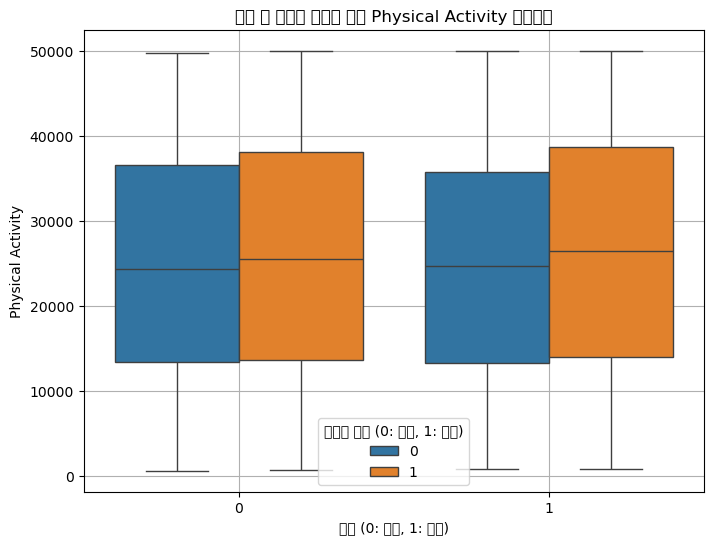

In [5]:
# 고혈압 여부를 기준으로 남녀별 박스플롯을 그려보기
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sex', y='Physical_activity', hue='Blood_Pressure_Abnormality', data=data)
plt.title("성별 및 고혈압 여부에 따른 Physical Activity 박스플롯")
plt.xlabel("성별 (0: 여성, 1: 남성)")
plt.ylabel("Physical Activity")
plt.legend(title="고혈압 여부 (0: 아님, 1: 있음)")
plt.grid(True)
plt.show()

c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54792 (\N{HANGUL SYLLABLE HYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(b

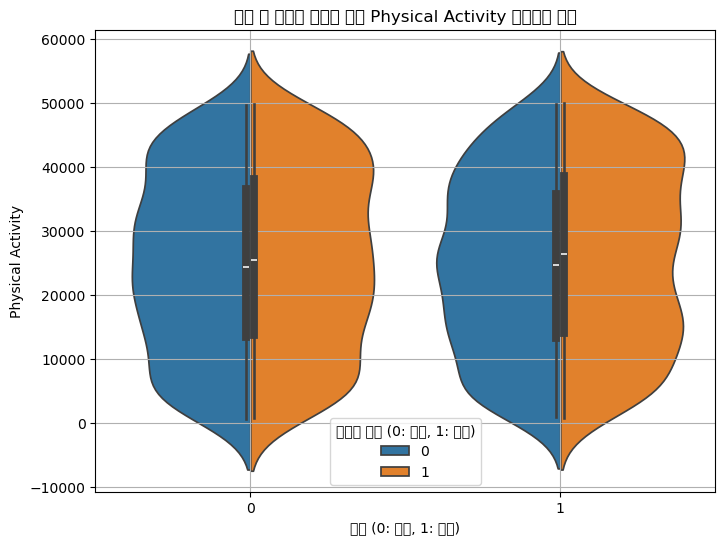

In [6]:
# 고혈압 여부를 기준으로 남녀별 바이올린플롯 그리기
plt.figure(figsize=(8, 6))
sns.violinplot(x='Sex', y='Physical_activity', hue='Blood_Pressure_Abnormality', data=data, split=True)
plt.title("성별 및 고혈압 여부에 따른 Physical Activity 바이올린 플롯")
plt.xlabel("성별 (0: 여성, 1: 남성)")
plt.ylabel("Physical Activity")
plt.legend(title="고혈압 여부 (0: 아님, 1: 있음)")
plt.grid(True)
plt.show()

c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

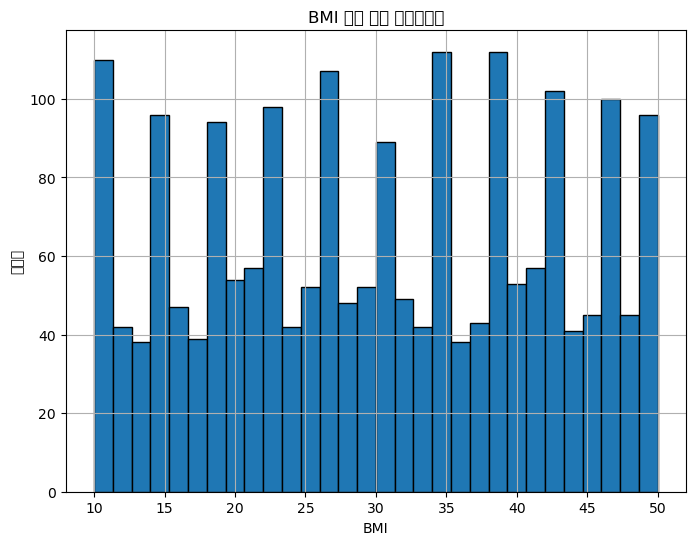

In [7]:
# BMI의 수치 분포를 히스토그램으로 시각화
plt.figure(figsize=(8, 6))
plt.hist(data['BMI'], bins=30, edgecolor='black')
plt.title("BMI 수치 분포 히스토그램")
plt.xlabel("BMI")
plt.ylabel("빈도수")
plt.grid(True)
plt.show()

c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

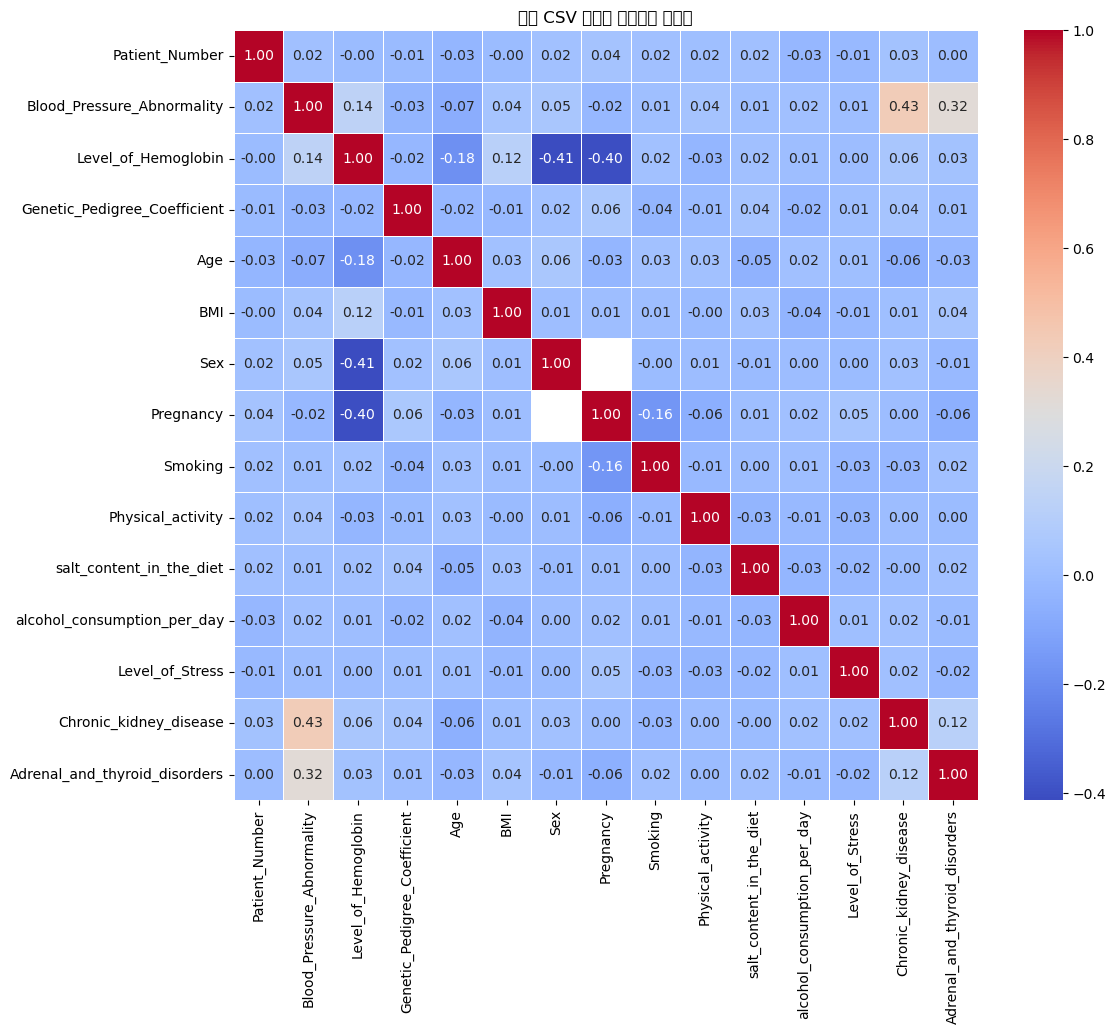

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 분석을 위한 숫자형 데이터만 선택
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# 상관계수 계산
corr = numeric_df.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("전체 CSV 파일의 상관관계 히트맵")
plt.show()


c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

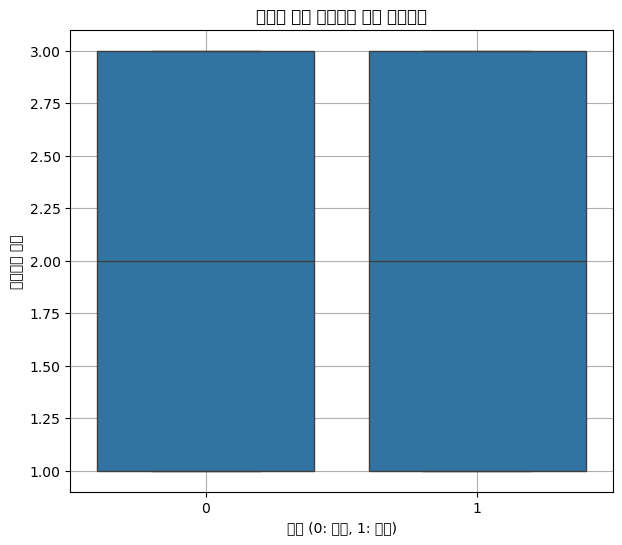

In [9]:
# 성별에 따른 스트레스 지수 박스플롯
plt.figure(figsize=(7, 6))
sns.boxplot(x='Sex', y='Level_of_Stress', data=data)
plt.title("성별에 따른 스트레스 지수 박스플롯")
plt.xlabel("성별 (0: 여성, 1: 남성)")
plt.ylabel("스트레스 지수")
plt.grid(True)
plt.show()

c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 55137 (\N{HANGUL SYLLABLE HEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\tjdgu\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

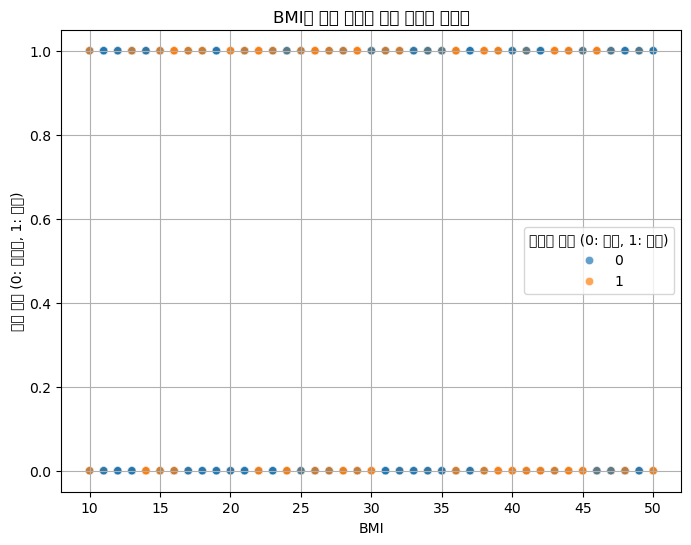

In [10]:
# BMI와 Smoking을 기준으로 고혈압 여부에 따른 산점도(Scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='BMI', y='Smoking', hue='Blood_Pressure_Abnormality', alpha=0.7)
plt.title("BMI와 흡연 여부에 따른 고혈압 산점도")
plt.xlabel("BMI")
plt.ylabel("흡연 여부 (0: 비흡연, 1: 흡연)")
plt.legend(title="고혈압 여부 (0: 아님, 1: 있음)")
plt.grid(True)
plt.show()

In [11]:
# 결측치 확인
data.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [12]:
# 1. 수치형 데이터는 평균(mean)으로 결측치 채움
for col in ['Genetic_Pedigree_Coefficient', 'alcohol_consumption_per_day']:
    mean_val = data[col].mean()
    data[col] = data[col].fillna(mean_val)

# 2. 범주형처럼 보이는 데이터(Pregnancy)는 최빈값(mode)으로 채움
mode_val = data['Pregnancy'].mode()[0]
data['Pregnancy'] = data['Pregnancy'].fillna(mode_val)

In [13]:
data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,251.008532,2,1,1
1,2,0,9.75,0.23,54,33,1,0.0,0,26106,25333,205.000000,3,0,0
2,3,1,10.79,0.91,70,49,0,0.0,0,9995,29465,67.000000,2,1,0
3,4,0,11.00,0.43,71,50,0,0.0,0,10635,7439,242.000000,1,1,0
4,5,1,14.17,0.83,52,19,0,0.0,0,15619,49644,397.000000,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,0.0,1,26118,47568,144.000000,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,251.008532,3,1,1
1997,1998,1,16.91,0.22,18,42,0,0.0,0,14933,24753,251.008532,2,1,1
1998,1999,0,11.15,0.72,46,45,1,0.0,1,18157,15275,253.000000,3,0,1


<Axes: ylabel='count'>

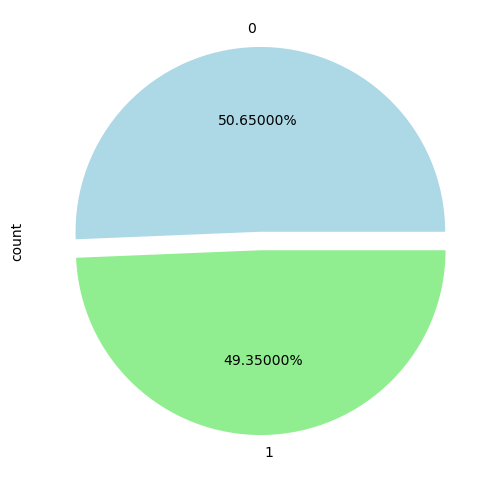

In [14]:
# 'Blood_Pressure_Abnormality' 0/1 비율 시각화
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
data.Blood_Pressure_Abnormality.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05))

In [15]:
# 데이터와 타겟 분리
X = data.drop('Blood_Pressure_Abnormality', axis=1).values
y = data['Blood_Pressure_Abnormality'].values

In [16]:
# 데이터 정규화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 훈련 데이터, 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((1600, 14), (400, 14), (1600,), (400,))

In [18]:
# 넘파이를 파이토치 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.int64)

In [19]:
# 데이터를 배치사이즈 만큼 꺼내줌
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# 입력값, 정답값 하나로 묶기
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600]),
 torch.Size([400]))

# 모델 정의

In [21]:
class DiabetesClassifier(nn.Module):
    def __init__(self):
        super(DiabetesClassifier, self).__init__()
        self.fc1 = nn.Linear(14, 64)     # 입력특성: 14개, 노드수: 64개
        self.fc2 = nn.Linear(64, 32)    # 노드수: 64 -> 32
        self.fc3 = nn.Linear(32, 2)  # 노드수: 32 -> 2(클래스 개수)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = DiabetesClassifier()

# 손실 함수 및 최적화 기법 정의

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 모델 학습

In [23]:
# 학습 중 손실값과 정확도 저장할 리스트
train_losses = []
test_accuracies = []

# 학습 반복 횟수 설정 (에폭 수)
num_epochs = 20

for epoch in range(num_epochs):
    model.train()  # 모델을 학습 모드로 설정
    running_loss = 0.0

    # 훈련용 데이터를 32개씩 나누어 학습
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()         # 매번 기울기 초기화
        outputs = model(inputs)       # 예측값 계산 (순전파)
        loss = criterion(outputs, labels)  # 예측값과 정답 비교해서 손실 계산
        loss.backward()               # 역전파: 손실을 기준으로 기울기 계산
        optimizer.step()              # 계산된 기울기로 가중치 업데이트

        running_loss += loss.item()   # 손실 누적

    # 한 에폭당 평균 손실 저장
    train_losses.append(running_loss / len(train_dataloader))

    # 테스트 데이터로 성능 평가
    model.eval()      # 평가 모드 전환
    correct = 0
    total = 0
    with torch.no_grad():  # 평가할 땐 기울기 계산 X (속도 ↑)
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)  # 예측 확률이 가장 높은 클래스 선택
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # 정확도 계산 (올바르게 예측한 수 / 전체 수)
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    # 에폭별 결과 출력
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.6564, Accuracy: 70.25%
Epoch 2/20, Loss: 0.5553, Accuracy: 74.25%
Epoch 3/20, Loss: 0.5112, Accuracy: 76.25%
Epoch 4/20, Loss: 0.4833, Accuracy: 77.75%
Epoch 5/20, Loss: 0.4556, Accuracy: 80.75%
Epoch 6/20, Loss: 0.4204, Accuracy: 81.75%
Epoch 7/20, Loss: 0.3853, Accuracy: 84.75%
Epoch 8/20, Loss: 0.3526, Accuracy: 86.25%
Epoch 9/20, Loss: 0.3272, Accuracy: 87.00%
Epoch 10/20, Loss: 0.3085, Accuracy: 87.50%
Epoch 11/20, Loss: 0.2919, Accuracy: 89.00%
Epoch 12/20, Loss: 0.2828, Accuracy: 88.75%
Epoch 13/20, Loss: 0.2747, Accuracy: 88.75%
Epoch 14/20, Loss: 0.2665, Accuracy: 88.00%
Epoch 15/20, Loss: 0.2613, Accuracy: 89.25%
Epoch 16/20, Loss: 0.2565, Accuracy: 89.00%
Epoch 17/20, Loss: 0.2518, Accuracy: 89.75%
Epoch 18/20, Loss: 0.2479, Accuracy: 89.50%
Epoch 19/20, Loss: 0.2405, Accuracy: 88.00%
Epoch 20/20, Loss: 0.2366, Accuracy: 89.50%
Training complete.


# 모델 평가

In [24]:
# 평가 모드 전환
model.eval()

# 모든 예측값과 실제값을 담을 리스트
all_labels = []
all_predictions = []

# 테스트 데이터로 전체 예측 수행
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# 넘파이 배열로 변환
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# 혼동행렬 계산
conf_matrix = confusion_matrix(all_labels, all_predictions)

# 성능 지표 계산
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# 각 클래스별 특이도 계산 (False Positive를 얼마나 잘 피했는가)
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

# 결과 출력
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[185  23]
 [ 19 173]]
F1 Score: 0.90
Precision: 0.90
Recall: 0.90
Specificity: 0.90


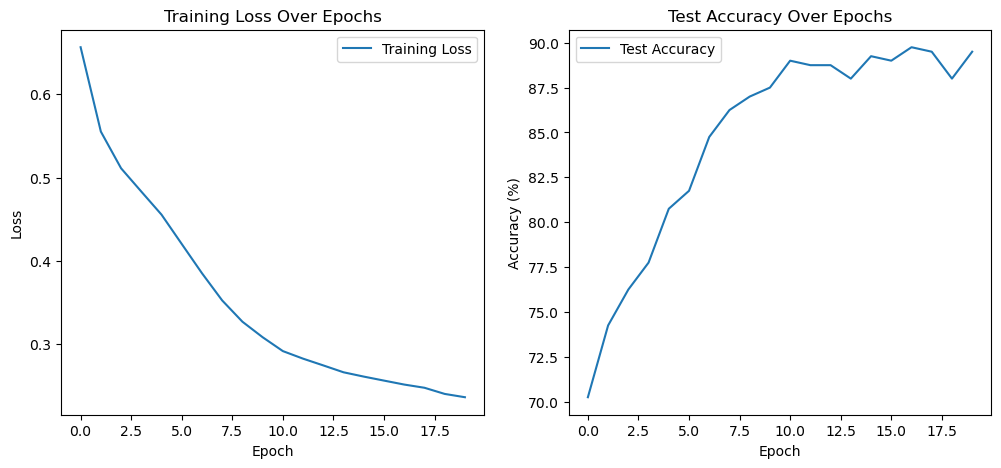

In [25]:
# 에폭(epoch)에 따른 손실과 정확도 시각화
plt.figure(figsize=(12, 5))  # 전체 그래프 크기 지정

# 왼쪽 그래프: 손실 변화
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# 오른쪽 그래프: 정확도 변화
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

# 그래프 출력
plt.show()